In [4]:
# Text =

# "I Love python"
# "python is Language"
# "python is use for coding"

# # Text convert into Vectors

# I Love python is language use for coding
# [11100000]
# [00111000] ---- > vectors ---- > Polarity_score --- > 0.1 < positive , -0.1> negative , 0 neutral
# [00110111]

# Textblob Library

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("linkedin-reviews.csv")
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis
We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we
can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.

Plotting the Distribution of Ratings

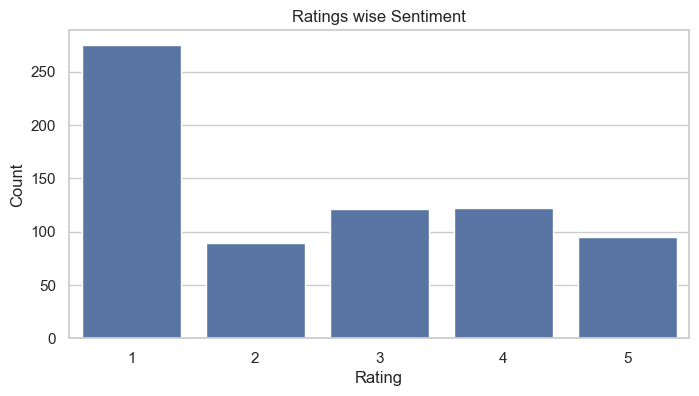

In [8]:
sns.set(style = "whitegrid")
plt.figure(figsize = (8,4))
sns.countplot(data = df , x = "Rating")
plt.title("Ratings wise Sentiment")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [9]:
df.groupby('Rating').size().reset_index(name= "candidates")

,Rating,candidates
0,1,275
1,2,89
2,3,121
3,4,122
4,5,95


# Adding Sentiment Labels in the Data
We will use Textblob library. Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text
. We can use this score to classify each review's sentiment as positive, negative or neutral.

In [12]:
#!pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral'


In [15]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [18]:
df.sample(5)

,Review,Rating,Sentiment
403,"Great app, works fine :-) x8",5,Positive
29,Looked good but then stopped working HTC desir...,2,Positive
53,Ok but need landscape mode for xoom,3,Positive
398,Crash since last update MyTouch 4G,1,Neutral
312,Linkedin needs to listen to what people want,2,Neutral


# Analyzing App Review Sentiments

In [20]:
df['Sentiment'].value_counts()

Sentiment
Neutral     300
Positive    295
Negative    107
Name: count, dtype: int64

<Axes: ylabel='count'>

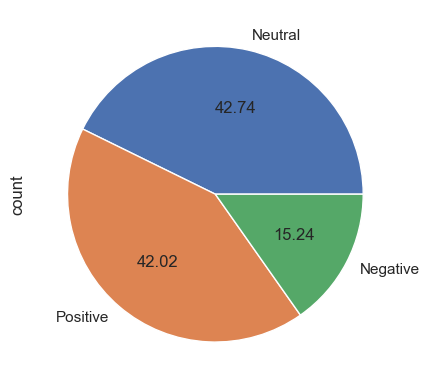

In [22]:
df['Sentiment'].value_counts().plot(kind = "pie" , autopct = "%.2f")

# So, we can see althrough the app has low ratings , still the
reviewers don't use many negative words in the reviews for the
app.
Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether
there is a correlation between the sentiment of the text and numerical ratings.

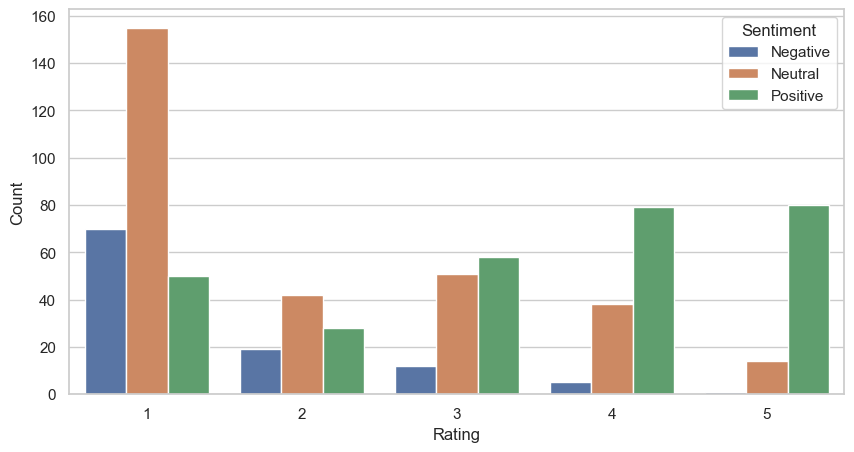

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
            x = 'Rating',
            hue = 'Sentiment' )
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# summary
App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize
feature updates and maintain a positive user community. It involves using data analysis tchniques to determine whether the
sentiments in these reviews are positive , negative or neutral.